In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df1 = read.csv('https://raw.githubusercontent.com/yipei-yo/BIOS512/master/pokemon.csv')
df1%>%head

name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<fct>,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
Charmander,88.1,4,60,50,65,fire,,8.5,1,0
Charmeleon,88.1,5,80,65,80,fire,,19.0,1,0
Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0


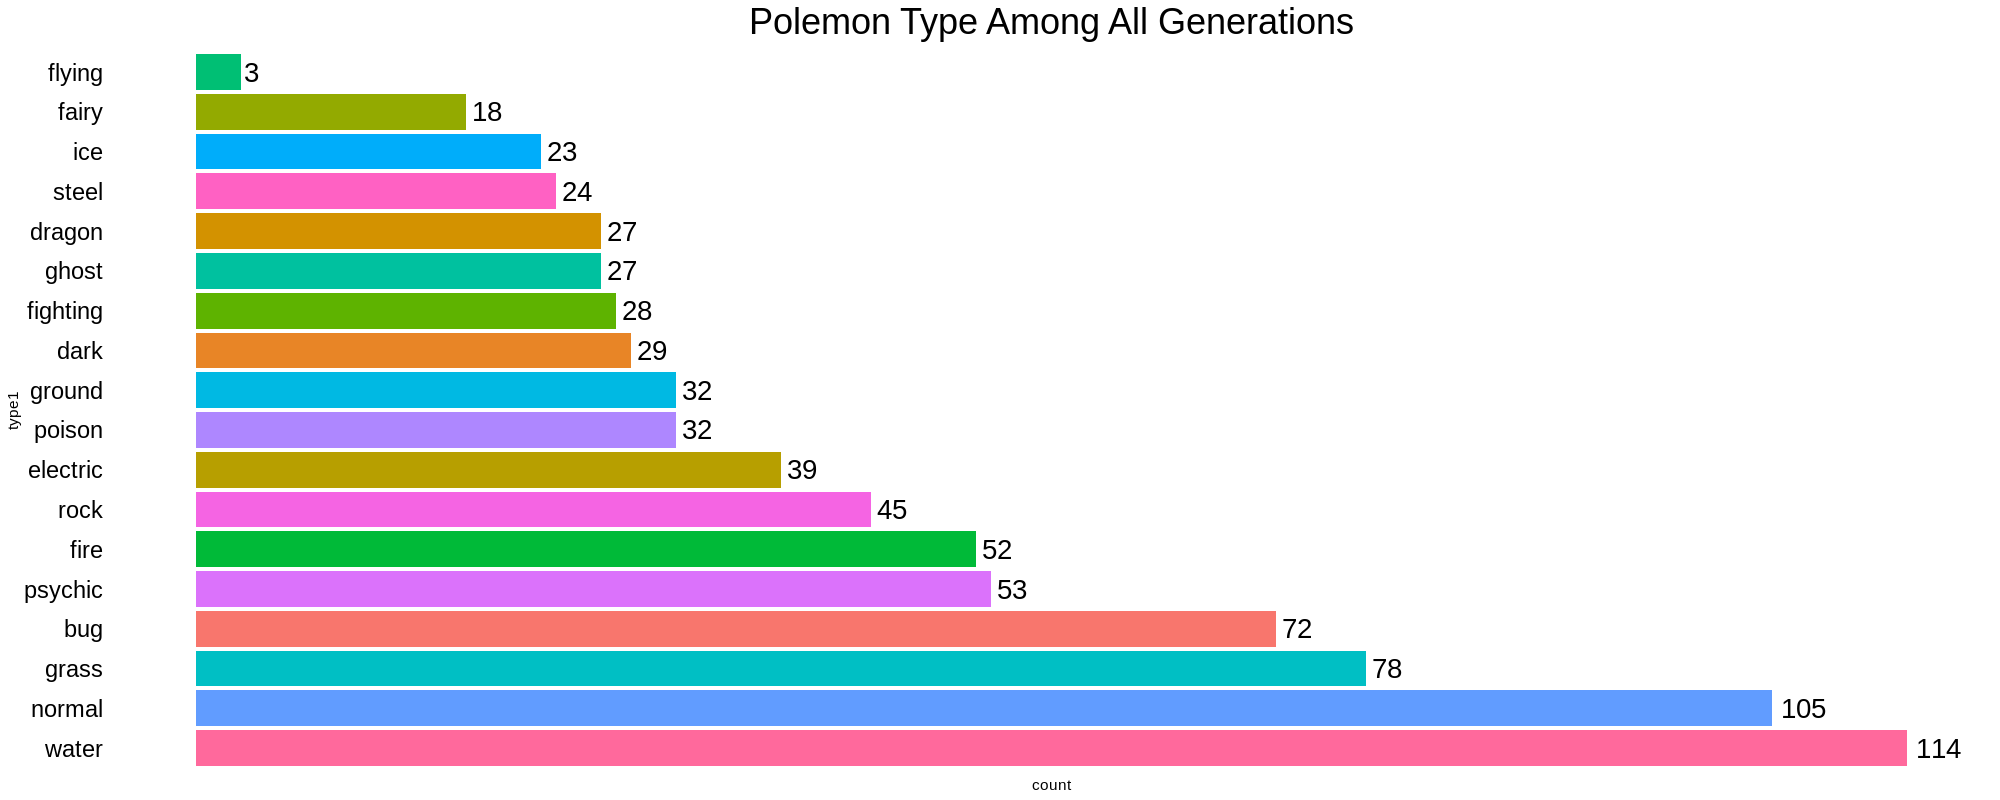

In [36]:
options(repr.plot.res = 100, repr.plot.width=20, repr.plot.height = 8)
p = ggplot(df1, aes(x=type1, fill=type1))
p = p + geom_bar()
p = p + coord_flip()
p = p + ggtitle("Polemon Type Among All Generations")
p = p + geom_text(stat='count', aes(label=..count..), hjust=-0.2, size=7)
p = p + theme(axis.text.y=element_text(color="black",size=17),axis.text.x=element_blank(),
              legend.position="none",
              plot.title = element_text(size=26, hjust=0.5))
p = p + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.ticks = element_blank())
p = p + scale_x_discrete(limits=c("water", "normal", "grass","bug","psychic","fire","rock","electric","poison","ground","dark","fighting","ghost","dragon","steel","ice","fairy","flying"))
p

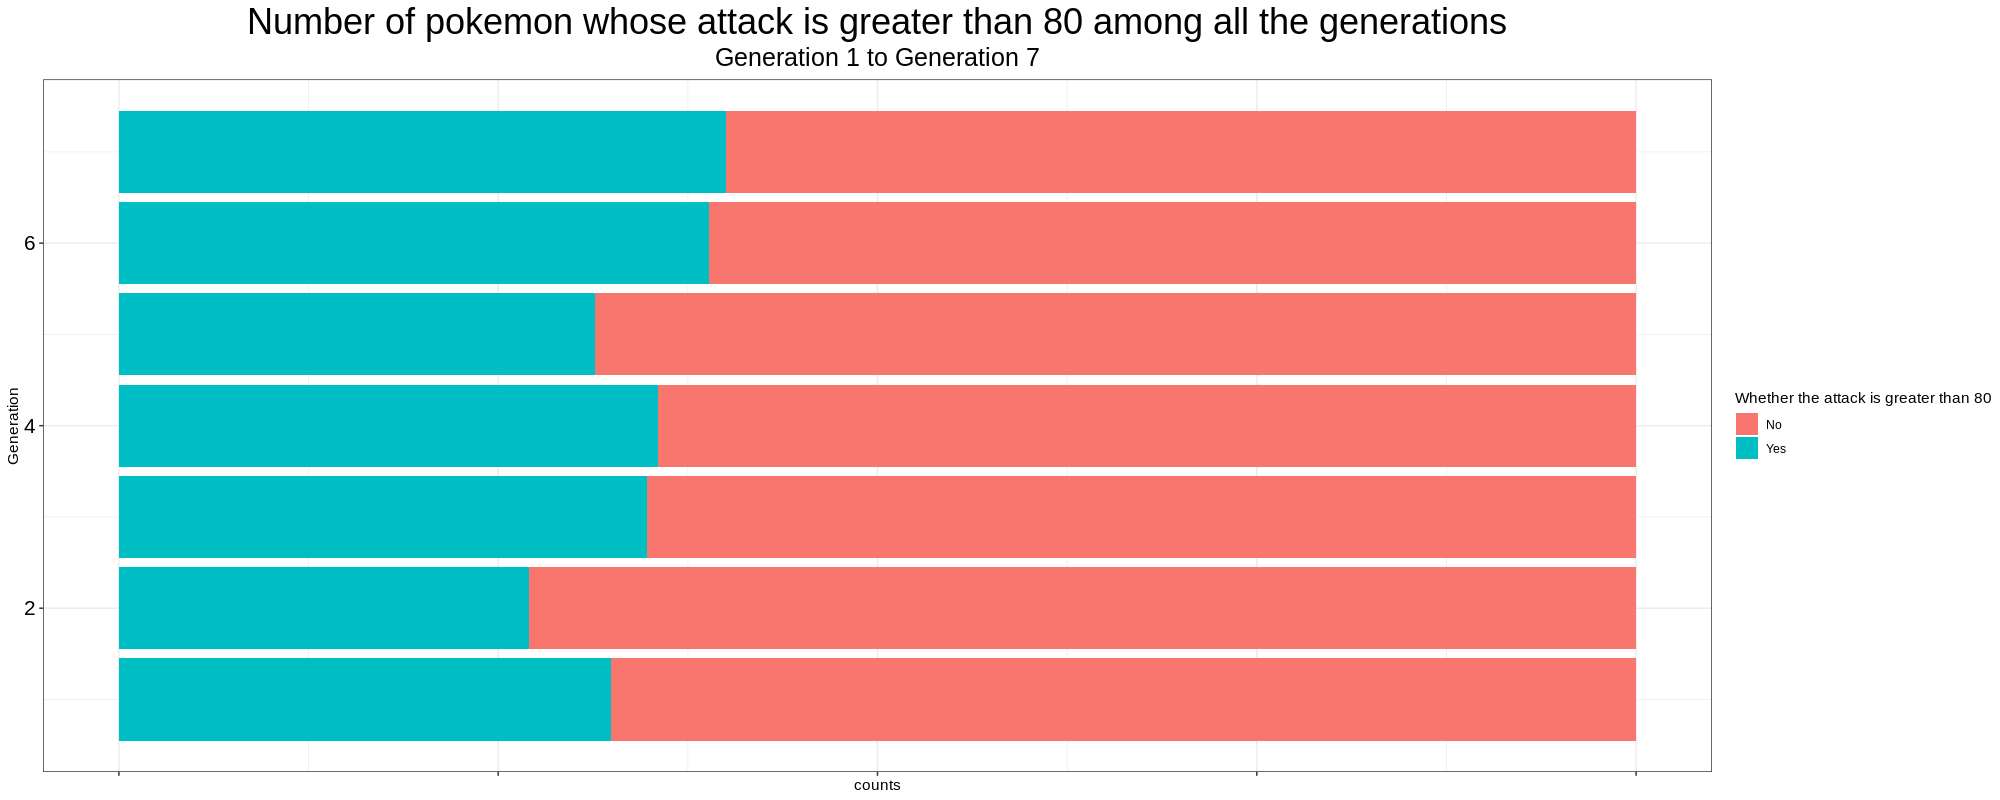

In [52]:
df2 <- df1 %>% 
mutate(sp_attack = ifelse(sp_attack > 80, 'yes', 'no')) %>% 
group_by(generation) %>% 
count(sp_attack) %>% 
spread(sp_attack, n) %>% 
mutate(yes = ifelse(is.na(yes), 0, yes)) %>% 
gather('yes', 'no', key = 'sp_attack', value = "pokemon") %>% 
data.frame()%>% 
ggplot(aes(x = generation, y = pokemon, fill = sp_attack)) + 
geom_col(position = 'fill') + theme_bw() +
labs(x = 'Generation', y = 'counts',title = 'Number of pokemon whose attack is greater than 80 among all the generations',subtitle = 'Generation 1 to Generation 7') +
theme(axis.text.y=element_text(color="black",size=15),axis.text.x=element_blank(),legend.position="right", plot.title = element_text(size=26, hjust=0.5),plot.subtitle = element_text(size=18, hjust=0.5)) +
scale_fill_discrete(name = "Whether the attack is greater than 80", labels = c('No', 'Yes')) +
coord_flip()
df2

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: p = ggplot(df2, aes(x = generation, y = pokemon)
2:            
  ^
